# **Practice 9: Linear Quadratic Regulator**

---

## **Linear Quadratic Regulator**
The theory of optimal control is concerned with operating a dynamic system at minimum cost. The case where the system dynamics are described by a set of linear differential equations and the cost is described by a quadratic function is called the LQ problem.

Consider  LTI, dynamics is:
\begin{equation}
\dot {\mathbf{x}} = \mathbf{A}  \mathbf{x} + \mathbf{B} \mathbf{u}
\end{equation}

We looking for control $\mathbf{u}$ such that the following cost is minimized:
\begin{equation}
J_c = \int_0^\infty 
\big[
\mathbf  x^\top \mathbf{Q} \mathbf{x} +
\mathbf  u^\top \mathbf{R} \mathbf{u} 
\big]dt
\end{equation}




### **Continues Time**

In order to get the solution of this problem one can use the several principles, such as HJB equation, dynamic programming, Pontryagin maxima principle, all in all the solution consist of two steps.

Solving the Riccati equation:
\begin{equation}
\mathbf{Q} - \mathbf{S} \mathbf{B} \mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S} 
 + \mathbf{S} \mathbf{A} + \mathbf{A}^\top \mathbf{S} = 0
\end{equation}

Control law is given by:

\begin{equation}
\mathbf  u = 
-\mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S} \mathbf{x}
\end{equation}

This is the desired control law. We can see that it is \emph{proportional}. We can re-write it as:
Or just 
\begin{equation}
\mathbf  u = -\mathbf K \mathbf{x}
\end{equation}
where $\mathbf K = \mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S}$

### **Example:**

Consider an inverted pendulum is a pendulum that has its center of mass above its pivot point. It is unstable and without additional help will fall over. It can be suspended stably in this inverted position by using a control system to monitor the angle of the pole and move the pivot point horizontally back under the center of mass when it starts to fall over, keeping it balanced. 

You may see the videos [here](https://www.youtube.com/watch?v=xRSLq3WJBew) and [here](https://www.youtube.com/watch?v=XWhGjxdug0o)




[ 0.          0.          8.57758707 -8.57758707]
[[-13.97161874  -1.59928553  -0.31622777  -0.52023256]]


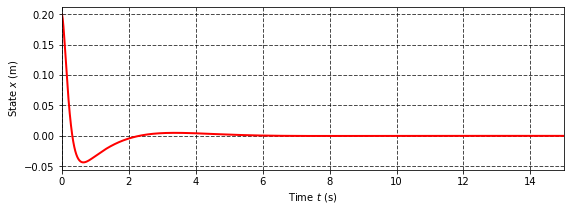

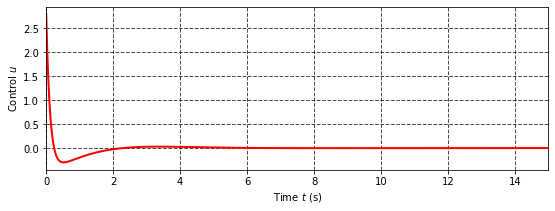

In [9]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are as are

def lqr(A, B, Q, R):
    # Solve the ARE
    S = are(A, B, Q, R)
    R_inv = np.linalg.inv(R)
    K = R_inv.dot((B.T).dot(S))
    Ac = A - B.dot(K)
    E = np.linalg.eigvals(Ac)
    return S, K, E


def system_ode(x, t, A, B, K):
    u = -np.dot(K,x)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx


t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
y_0 = 0.5
x0 = [0.2, 0, 0, 0] # Set initial state 


M, m, l, g = .4, .2, 0.2, 9.81

A = [[0, 1, 0, 0], 
     [g*(M+m)/(M*l), 0, 0, 0],
     [0,0,0,1],
     [-m*g/M, 0,0,0]]

A = np.array(A)

print(np.linalg.eigvals(A))

B = [[0], 
     [-1/(M*l)], 
     [0], 
     [1/M]]

B = np.array(B)

Q = np.diag([1,0.1,1,0.1])

R = np.diag([10])



S, K, E = lqr(A, B, Q, R)
print(K)
x_sol = odeint(system_ode, x0, t, args=(A, B, K )) # integrate system "sys_ode" from initial state $x0$
u_sol = - K.dot(x_sol.T).T
from matplotlib.pyplot import *
theta, dtheta, x, dx = x_sol[:, 0], x_sol[:, 1], x_sol[:, 2], x_sol[:, 3]


figure(figsize=(9, 3))
plot(t, theta, 'r', linewidth=2.0)
# plot(t, x, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$ (m)')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(9, 3))
plot(t, u_sol, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Control ${u}$')
xlabel(r'Time $t$ (s)')
show()


>**HW EXERCISE**: 
Try to simulate the linear feedback on the nonlinear system with state $\mathbf{x}=[\theta, \dot{\theta}, x, \dot{x}]^T$ and dynamics given by:
\begin{equation}
\begin{cases} 
\left(M+m\right){\ddot {x}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{x} \cos \theta  \\
\end{cases}
\end{equation}

### **LQR and Poles**

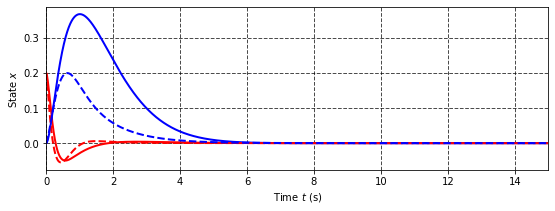

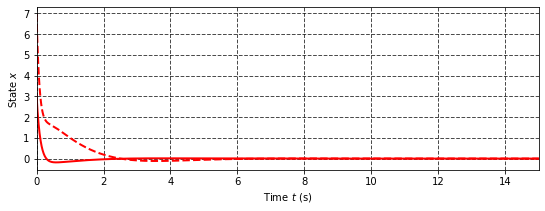

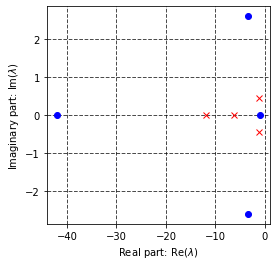

In [6]:
import numpy as np
from scipy.signal import place_poles


Q = np.diag([1,1,1,1])
R = np.diag([1])

simulations = {'fast':{'R':R/10},'slow':{'R':R*5}}

for sim_type in simulations.keys():
  R = simulations[sim_type]['R']
  S, K, E = lqr(A, B, Q, R)
  simulations[sim_type]['eigs'] = E
  simulations[sim_type]['K'] = K
  simulations[sim_type]['x'] = odeint(system_ode, x0, t, args=(A, B, K ))
  simulations[sim_type]['u'] = - K.dot(x_sol.T).T
  

figure(figsize=(9, 3))
plot(t, simulations['slow']['x'][:,0], 'r', linewidth=2.0)
plot(t, simulations['slow']['x'][:,2], 'b', linewidth=2.0)
plot(t, simulations['fast']['x'][:,0], 'r--', linewidth=2.0)
plot(t, simulations['fast']['x'][:,2], 'b--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(9, 3))
plot(t, simulations['slow']['u'], 'r', linewidth=2.0)
plot(t, simulations['fast']['u'], 'r--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(4, 4))
plot(simulations['fast']['eigs'].real, simulations['fast']['eigs'].imag, 'bo', label='Fast')
plot(simulations['slow']['eigs'].real, simulations['slow']['eigs'].imag, 'rx',
         label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()



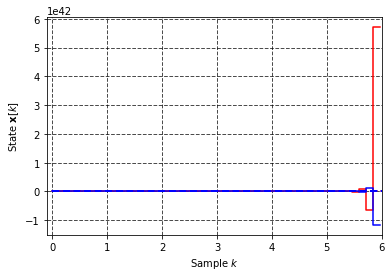

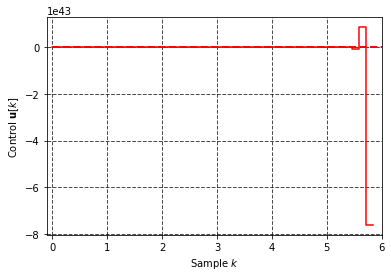

In [7]:
from scipy.signal import cont2discrete as c2d
C = [1,0,0,0]
C = np.array(C)
D = np.array([[0]])

T = 0.13
tf = 6
N = int(tf/T)
A_d, B_d, C, D, _ = c2d((A,B,C,D), T)

K = simulations['fast']['K']
state_c = simulations['fast']['x']
u_c = simulations['fast']['u']
eigs_c = simulations['fast']['eigs']

x = np.array([0.2, 0, 0, 0])
X = x
U = []

for k in range(N):
  u = -np.dot(K,x)
  U.append(u)
  x = A_d.dot(x) + B_d.dot(u)
  X = np.vstack((X, x))



theta_c, dtheta_c, x_c, dx_c = state_c[:, 0], state_c[:, 1], state_c[:, 2], state_c[:, 3]
theta_d, dtheta_d, x_d, dx_d =X[:, 0], X[:, 1], X[:, 2], X[:, 3]

step(T*np.arange(N+1),theta_d, 'r')
step(T*np.arange(N+1),x_d, 'b')
plot(t, theta_c, 'r--', linewidth=2.0)
plot(t, x_c, 'b--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'State $\mathbf{x}[k]$')
xlabel(r'Sample $k$')
xlim([-0.1, tf])
show()

step(T*np.arange(N),U, 'r')
plot(t, u_c, 'r--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([-0.1, tf])
ylabel(r'Control $\mathbf{u}[k]$')
xlabel(r'Sample $k$')
show()

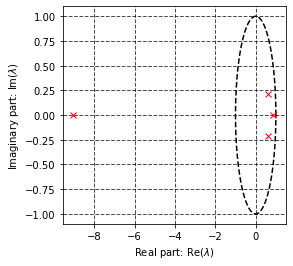

In [8]:
eigs_d = np.linalg.eigvals(A_d - B_d.dot(K))

z = np.linspace(0, 2*np.pi, 500)

figure(figsize=(4, 4))
plot(np.cos(z), np.sin(z), 'k--')  # unit circle
# plot(eigs_c.real, eigs_c.imag, 'bo', label='Fast')
plot(eigs_d.real, eigs_d.imag, 'rx', label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()

### **Discrete Time LQR**
For a discrete-time linear system described by:

\begin{equation}
\mathbf{x}_{k+1}=\mathbf{A} \mathbf{x}_{k}+\mathbf{B}\mathbf{u}_{k}
\end{equation}
with a performance index defined as:
\begin{equation}
J_c=\sum \limits _{{k=0}}^{{\infty }}\left(\mathbf{x}_{k}^{T}\mathbf{Q}\mathbf{x}_{k}+\mathbf{u}_{k}^{T}\mathbf{R}\mathbf{u}_{k}\right)
\end{equation}

the optimal control sequence minimizing the performance index is given by:
\begin{equation}
\mathbf{u}_{k}=-\mathbf{K} \mathbf{x}_{k}
\end{equation}

where:
\begin{equation}
\mathbf{K}=(\mathbf{R}+\mathbf{B}^{T}\mathbf{S}\mathbf{B})^{{-1}}\mathbf{B}^{T}\mathbf{S}\mathbf{A}
\end{equation}

and $\mathbf{S}$ is the unique positive definite solution to the discrete time algebraic Riccati equation (DARE):

\begin{equation}
\mathbf{S}=\mathbf{A}^{T}\mathbf{S}\mathbf{A}-(\mathbf{A}^{T}\mathbf{S}\mathbf{B})\left(\mathbf{R}+\mathbf{B}^{T}\mathbf{S}\mathbf{B}\right)^{{-1}}(\mathbf{B}^{T}\mathbf{S}\mathbf{A})+\mathbf{Q}
\end{equation}

>**HW EXERCISE**: 
Implement the Discrete Time LQR